In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests

In [2]:
#Get Datas and convert to Dataframe:
path='C:/Users/USER/Desktop/Project 1/DataSets'

HR_Resource=[]

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        file_path=os.path.join(path, filename)
        df=pd.read_csv(file_path,  encoding='ISO-8859-1')
        HR_Resource.append(df)

df_final=pd.concat(HR_Resource, ignore_index=True)

In [3]:
df_final

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0
195141,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195142,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195143,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [4]:
# remove unnec comma, semi colon:
df_final['State Code'] = df_final['State Code'].astype(str).str.replace('`','').astype('int64')
df_final['District Code'] = df_final['District Code'].astype(str).str.replace('`','').astype('int64')
df_final['Division'] = df_final['Division'].astype(str).str.replace('`','').astype('int64')
df_final['Group'] = df_final['Group'].astype(str).str.replace('`','').astype('int64')
df_final['Class'] = df_final['Class'].astype(str).str.replace('`','').astype('int64')

In [5]:
# remove spl char

def remove_sp_char(column_name):
    return ''.join(e for e in column_name if e.isalnum() or e in ('_', '.'))

df_final.columns = [remove_sp_char(col) for col in df_final.columns]

In [6]:
df_final.columns

Index(['StateCode', 'DistrictCode', 'IndiaStates', 'Division', 'Group',
       'Class', 'NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales'],
      dtype='object')

In [7]:
df_final.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
non_numeric_columns =df_final.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = df_final.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
StateCode,1.000000,0.851207,-0.010642,-0.001695,0.003277,-0.003645,-0.004775,0.001599,-0.004710,-0.005690,...,0.003503,-0.005332,-0.003995,-0.006299,-0.007676,-0.006013,-0.008593,0.000114,-0.000294,0.000589
DistrictCode,0.851207,1.000000,-0.005517,-0.005349,-0.004001,-0.028298,-0.027999,-0.027503,-0.028544,-0.028156,...,-0.026093,-0.027705,-0.027672,-0.026415,-0.028375,-0.028293,-0.027010,-0.024065,-0.025354,-0.021301
Division,-0.010642,-0.005517,1.000000,0.744991,0.438274,-0.010332,-0.010797,-0.007516,-0.013753,-0.013073,...,0.000091,-0.011351,-0.011699,-0.010492,-0.014724,-0.014173,-0.014414,-0.003224,-0.006859,0.001242
Group,-0.001695,-0.005349,0.744991,1.000000,0.593097,-0.014413,-0.014439,-0.013226,-0.016427,-0.015752,...,-0.008444,-0.014618,-0.015023,-0.013552,-0.016540,-0.016435,-0.015789,-0.009337,-0.011886,-0.005841
Class,0.003277,-0.004001,0.438274,0.593097,1.000000,-0.011074,-0.010969,-0.010713,-0.012066,-0.011600,...,-0.008203,-0.010986,-0.011278,-0.010196,-0.011908,-0.011956,-0.011270,-0.008139,-0.009593,-0.005999
MainWorkersTotalPersons,-0.003645,-0.028298,-0.010332,-0.014413,-0.011074,1.000000,0.996935,0.938961,0.982750,0.981071,...,0.926007,0.931390,0.962609,0.858475,0.904754,0.942542,0.829537,0.914343,0.954722,0.819452
MainWorkersTotalMales,-0.004775,-0.027999,-0.010797,-0.014439,-0.010969,0.996935,1.000000,0.909170,0.978081,0.983617,...,0.899947,0.917952,0.960615,0.835229,0.891626,0.941126,0.807887,0.901310,0.951808,0.795125
MainWorkersTotalFemales,0.001599,-0.027503,-0.007516,-0.013226,-0.010713,0.938961,0.909170,1.000000,0.930049,0.896767,...,0.971606,0.921079,0.899647,0.896725,0.895065,0.878534,0.862926,0.903520,0.896394,0.865368
MainWorkersRuralPersons,-0.004710,-0.028544,-0.013753,-0.016427,-0.012066,0.982750,0.978081,0.930049,1.000000,0.994983,...,0.882093,0.944638,0.967549,0.878677,0.937471,0.968126,0.866199,0.884830,0.923402,0.793600
MainWorkersRuralMales,-0.005690,-0.028156,-0.013073,-0.015752,-0.011600,0.981071,0.983617,0.896767,0.994983,1.000000,...,0.860010,0.928626,0.968135,0.848275,0.919353,0.968428,0.834551,0.874606,0.924458,0.770562


In [9]:
df_final.shape

(195145, 25)

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   StateCode                    195145 non-null  int64 
 1   DistrictCode                 195145 non-null  int64 
 2   IndiaStates                  195145 non-null  object
 3   Division                     195145 non-null  int64 
 4   Group                        195145 non-null  int64 
 5   Class                        195145 non-null  int64 
 6   NICName                      195145 non-null  object
 7   MainWorkersTotalPersons      195145 non-null  int64 
 8   MainWorkersTotalMales        195145 non-null  int64 
 9   MainWorkersTotalFemales      195145 non-null  int64 
 10  MainWorkersRuralPersons      195145 non-null  int64 
 11  MainWorkersRuralMales        195145 non-null  int64 
 12  MainWorkersRuralFemales      195145 non-null  int64 
 13  MainWorkersUrb

In [11]:
df_final.isnull().sum()

StateCode                      0
DistrictCode                   0
IndiaStates                    0
Division                       0
Group                          0
Class                          0
NICName                        0
MainWorkersTotalPersons        0
MainWorkersTotalMales          0
MainWorkersTotalFemales        0
MainWorkersRuralPersons        0
MainWorkersRuralMales          0
MainWorkersRuralFemales        0
MainWorkersUrbanPersons        0
MainWorkersUrbanMales          0
MainWorkersUrbanFemales        0
MarginalWorkersTotalPersons    0
MarginalWorkersTotalMales      0
MarginalWorkersTotalFemales    0
MarginalWorkersRuralPersons    0
MarginalWorkersRuralMales      0
MarginalWorkersRuralFemales    0
MarginalWorkersUrbanPersons    0
MarginalWorkersUrbanMales      0
MarginalWorkersUrbanFemales    0
dtype: int64

In [12]:
df_final.describe()

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
count,195145.000000,195145.000000,195145.000000,195145.000000,195145.000000,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,...,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,195145.000000
mean,19.178278,332.223377,46.590351,389.422404,2293.804709,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,...,1.553830e+02,3.642672e+02,1.826322e+02,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472
std,9.057612,196.176206,28.800311,313.186034,3059.131669,4.568169e+04,3.773917e+04,8.582019e+03,2.044436e+04,1.654295e+04,...,4.531593e+03,1.176940e+04,5.760575e+03,6.309699e+03,8.232274e+03,3.723078e+03,4.748460e+03,3.842889e+03,2132.581727,1803.271234
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,10.000000,153.000000,23.000000,103.000000,0.000000,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,19.000000,332.000000,46.000000,370.000000,113.000000,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,...,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,27.000000,516.000000,70.000000,631.000000,4659.000000,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,...,1.200000e+01,2.800000e+01,1.800000e+01,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000
max,34.000000,637.000000,99.000000,992.000000,9920.000000,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,...,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [13]:
#Checking For Empty values Columns:
columns_empty=df_final.eq('').any()
columns_empty=columns_empty[columns_empty].index
print(columns_empty.tolist())

[]


In [14]:
df_final.nunique()

StateCode                        23
DistrictCode                    472
IndiaStates                     491
Division                         89
Group                           241
Class                           423
NICName                         587
MainWorkersTotalPersons        8679
MainWorkersTotalMales          7811
MainWorkersTotalFemales        3970
MainWorkersRuralPersons        5767
MainWorkersRuralMales          5218
MainWorkersRuralFemales        2694
MainWorkersUrbanPersons        6561
MainWorkersUrbanMales          5934
MainWorkersUrbanFemales        2929
MarginalWorkersTotalPersons    4208
MarginalWorkersTotalMales      3181
MarginalWorkersTotalFemales    2850
MarginalWorkersRuralPersons    3406
MarginalWorkersRuralMales      2535
MarginalWorkersRuralFemales    2379
MarginalWorkersUrbanPersons    2421
MarginalWorkersUrbanMales      1951
MarginalWorkersUrbanFemales    1557
dtype: int64

In [15]:
df_final.dtypes

StateCode                       int64
DistrictCode                    int64
IndiaStates                    object
Division                        int64
Group                           int64
Class                           int64
NICName                        object
MainWorkersTotalPersons         int64
MainWorkersTotalMales           int64
MainWorkersTotalFemales         int64
MainWorkersRuralPersons         int64
MainWorkersRuralMales           int64
MainWorkersRuralFemales         int64
MainWorkersUrbanPersons         int64
MainWorkersUrbanMales           int64
MainWorkersUrbanFemales         int64
MarginalWorkersTotalPersons     int64
MarginalWorkersTotalMales       int64
MarginalWorkersTotalFemales     int64
MarginalWorkersRuralPersons     int64
MarginalWorkersRuralMales       int64
MarginalWorkersRuralFemales     int64
MarginalWorkersUrbanPersons     int64
MarginalWorkersUrbanMales       int64
MarginalWorkersUrbanFemales     int64
dtype: object

In [16]:
df_final.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool

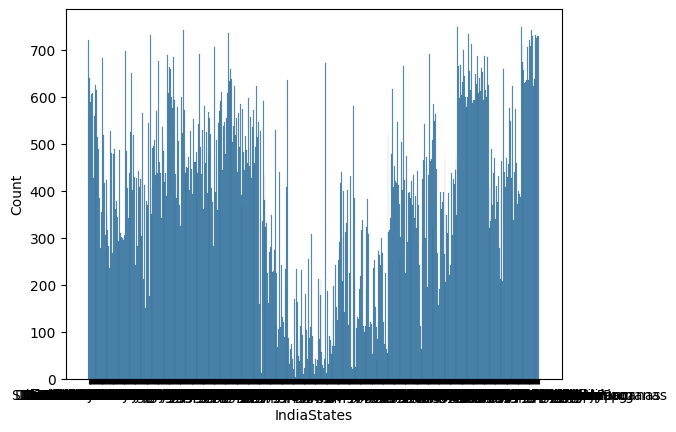

In [19]:
#Data Visualization:
sns.histplot(x='IndiaStates', data=df_final)
plt.show()

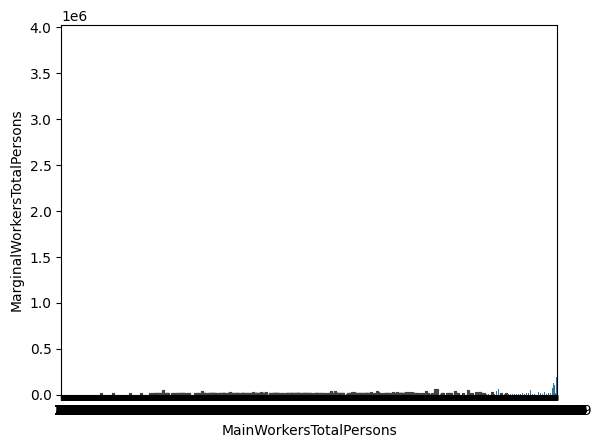

In [20]:
x='MainWorkersTotalPersons'
y='MarginalWorkersTotalPersons'
sns.barplot(x=x, y=y, data=df_final)
plt.show()

In [ ]:
column_drop=['StateCode','DistrictCode','Division','Group','Class']
df_final=df_final.drop(columns=column_drop)

In [21]:
df_final.columns

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales'],
      dtype='object')

In [24]:
# Extract 'State' and 'District' from 'India/States' column
df_final[['State','District']] = df_final['IndiaStates'].str.extract(r'STATE - (\w+)|District - (\w+)', expand=True)
df_final=df_final.drop('IndiaStates', axis=1)

In [25]:
df_final[['State','District']].isnull().sum()

State       180430
District     14715
dtype: int64

In [26]:
# Fill NaN values in 'State' column with forward fill (ffill)
df_final['State'] = df_final['State'].ffill()
df_final['District'] = df_final['District'].bfill()

In [27]:
df_final[['State','District']].isnull().sum()

State       0
District    0
dtype: int64

In [28]:
df_final

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District
0,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,...,44743,16266,1969,1494,475,59040,43249,15791,NCT,North
1,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,...,150,74,23,13,10,201,137,64,NCT,North
2,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,...,65,27,14,12,2,78,53,25,NCT,North
3,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,...,27,10,8,6,2,29,21,8,NCT,North
4,Growing of rice,9,9,0,0,0,0,9,9,0,...,0,0,0,0,0,0,0,0,NCT,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,Activities of extraterritorial organizations a...,18,12,6,0,0,0,18,12,6,...,0,0,0,0,0,0,0,0,WEST,Purba
195141,Blank,8244,5866,2378,5592,4090,1502,2652,1776,876,...,8488,17103,22057,7272,14785,3534,1216,2318,WEST,Purba
195142,Blank,8244,5866,2378,5592,4090,1502,2652,1776,876,...,8488,17103,22057,7272,14785,3534,1216,2318,WEST,Purba
195143,Incomplete description/ Wrongly Classifed,8324,4604,3720,6762,3974,2788,1562,630,932,...,3352,11520,13204,2934,10270,1668,418,1250,WEST,Purba


Feature Engineering

In [29]:
df_final['Total_Workers'] = df_final['MainWorkersTotalPersons'] + df_final['MarginalWorkersRuralPersons']
df_final['Male_Female_Ratio'] = df_final['MainWorkersTotalMales'] + df_final['MainWorkersTotalFemales'].replace(0, 1)

In [30]:
df_final[['Total_Workers','Male_Female_Ratio']].isnull().sum()

Total_Workers        0
Male_Female_Ratio    0
dtype: int64

In [31]:
df_final['Total_Population'] = df_final['MainWorkersTotalPersons'] + df_final['MarginalWorkersTotalPersons']
df_final['Worker_Ratio'] = df_final['Total_Workers'] / df_final['Total_Population']

In [32]:
df_final[['Total_Population','Worker_Ratio']].isnull().sum()

Total_Population    0
Worker_Ratio        0
dtype: int64

In [33]:
df_final[['Total_Population', 'Worker_Ratio']] = df_final[['Total_Population', 'Worker_Ratio']].astype(int)

In [34]:
df_final.to_csv("HR.csv", index=False)

In [35]:
path=r"C:/Users/USER/Desktop/Project 1/lat_long.csv"

geo=pd.read_csv(path)

In [38]:
df_geo=geo.drop(['Unnamed: 0','State.Name'], axis=1)

In [40]:
df_new=pd.concat([df_final,df_geo[['latitude','longitude']]], axis=1)
df_new.head()

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,Total_Workers,Male_Female_Ratio,Total_Population,Worker_Ratio,latitude,longitude
0,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,...,43249,15791,NCT,North,830949,828980,889989,0,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,...,137,64,NCT,North,1507,1484,1708,0,14.750429,78.570026
2,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,...,53,25,NCT,North,183,169,261,0,27.100399,93.616601
3,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,...,21,8,NCT,North,91,83,120,0,26.749981,94.216667
4,Growing of rice,9,9,0,0,0,0,9,9,0,...,0,0,NCT,North,9,10,9,1,25.785414,87.479973


In [41]:
df_new.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140     True
195141    False
195142     True
195143    False
195144     True
Length: 195145, dtype: bool

In [42]:
df_new.describe()

,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,...,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,Total_Workers,Male_Female_Ratio,Total_Population,Worker_Ratio,latitude,longitude
count,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,...,1.951450e+05,1.951450e+05,195145.000000,195145.000000,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,33.000000,33.000000
mean,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,1.435834e+02,8.315188e+02,6.761358e+02,1.553830e+02,3.642672e+02,...,1.337045e+02,1.140386e+02,66.108094,47.930472,1.742366e+03,1.492526e+03,1.856405e+03,0.542084,22.654234,82.200225
std,4.568169e+04,3.773917e+04,8.582019e+03,2.044436e+04,1.654295e+04,4.314446e+03,2.586781e+04,2.167339e+04,4.531593e+03,1.176940e+04,...,4.748460e+03,3.842889e+03,2132.581727,1803.271234,5.324545e+04,4.568168e+04,5.680538e+04,0.498227,6.894189,7.581593
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,8.900373,72.636867
25%,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,6.000000e+00,7.000000e+00,6.000000e+00,0.000000,19.250232,76.569993
50%,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,0.000000e+00,1.200000e+01,9.000000e+00,0.000000e+00,4.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,3.300000e+01,2.900000e+01,3.500000e+01,1.000000,23.835404,78.570026
75%,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,8.000000e+00,8.600000e+01,6.700000e+01,1.200000e+01,2.800000e+01,...,3.000000e+00,9.000000e+00,6.000000,2.000000,2.170000e+02,1.880000e+02,2.280000e+02,1.000000,27.333330,88.616647
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,...,1.291358e+06,1.318940e+06,742926.000000,576014.000000,1.813494e+07,1.561976e+07,1.945388e+07,1.000000,34.299959,94.216667


In [44]:
df_new[['latitude', 'longitude']].isnull().sum()

latitude     195112
longitude    195112
dtype: int64

In [45]:
# Calculate the mean of the 'Latitude' and 'Longitude' columns
mean_latitude = df_new['latitude'].mean()
mean_longitude = df_new['longitude'].mean()

# Fill the missing values with their respective mean values
df_new.loc[:, 'latitude'] = df_new['latitude'].fillna(mean_latitude)
df_new.loc[:, 'longitude'] = df_new['longitude'].fillna(mean_longitude)

In [46]:
df_new[['latitude', 'longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [49]:
df_new.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'Total_Workers', 'Male_Female_Ratio', 'Total_Population',
       'Worker_Ratio', 'latitude', 'longitude'],
      dtype='object')

Outliers

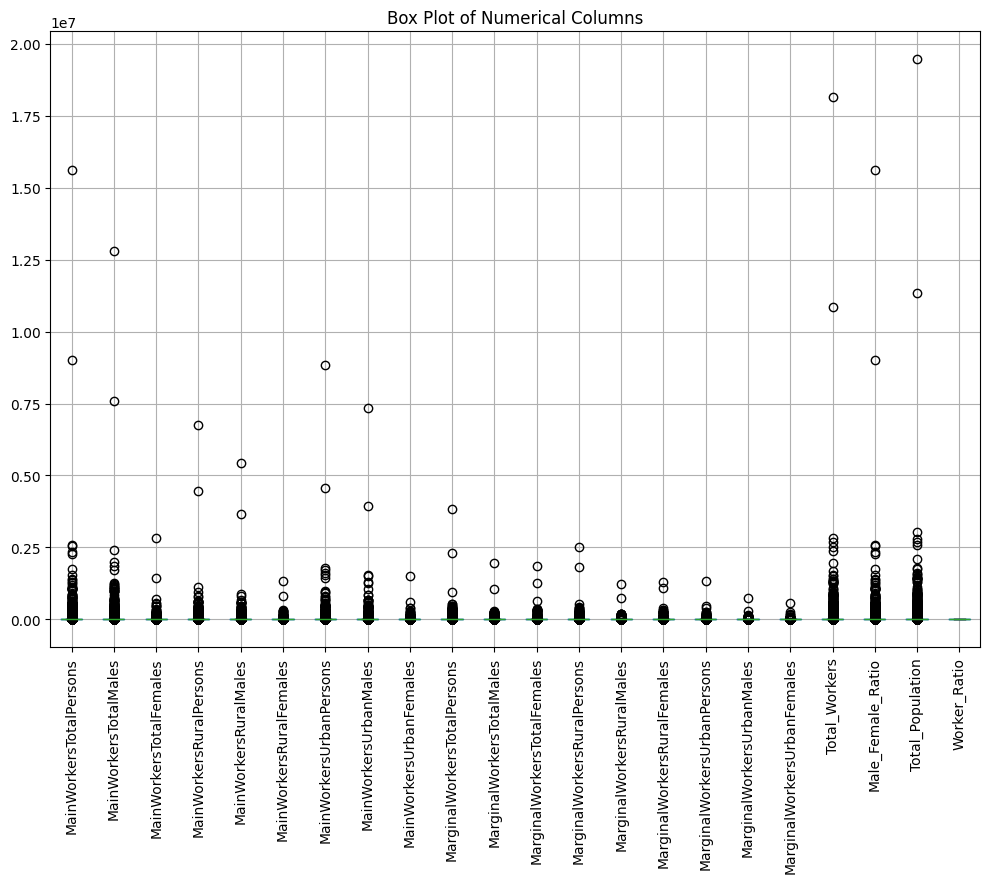

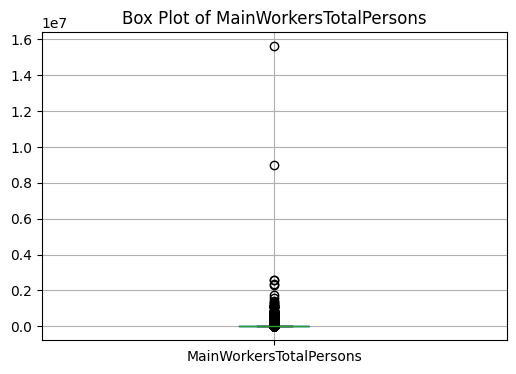

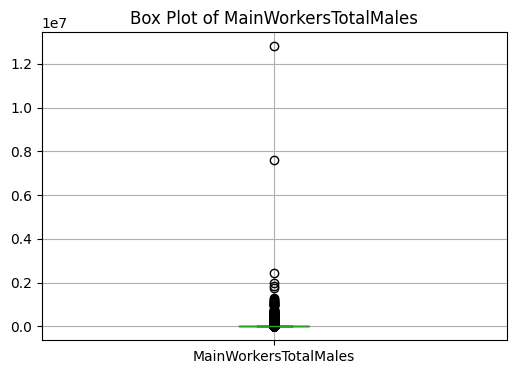

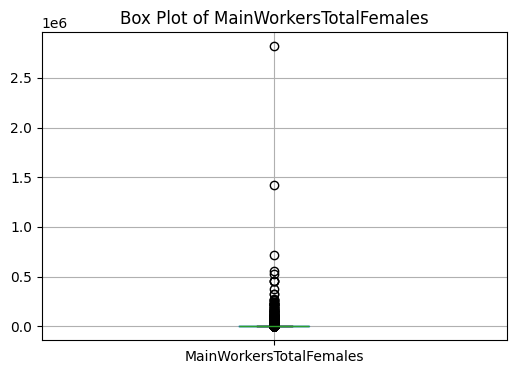

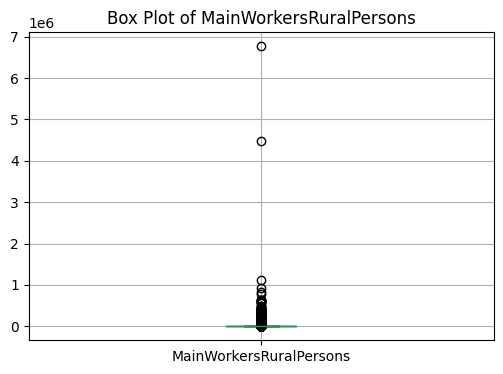

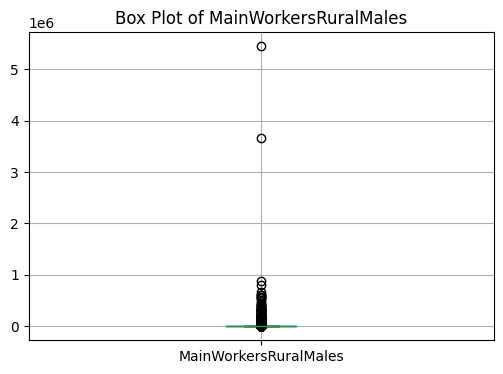

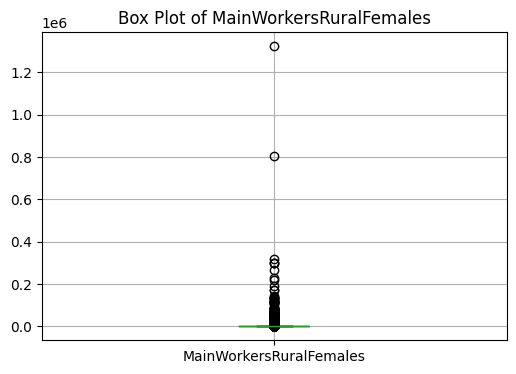

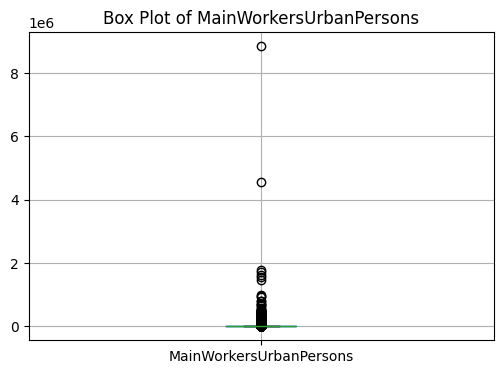

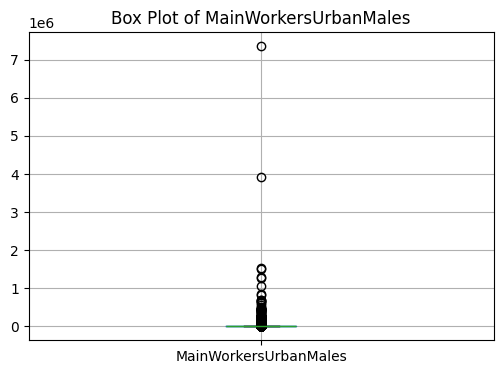

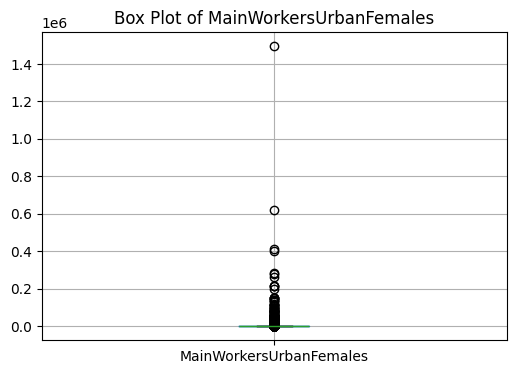

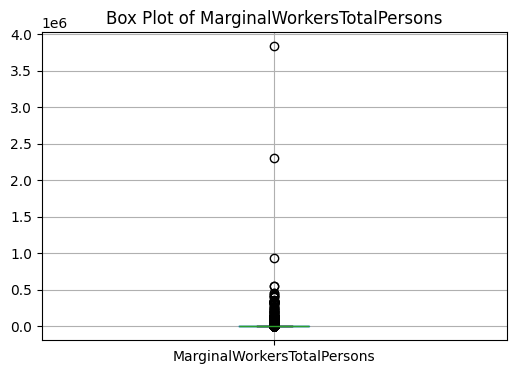

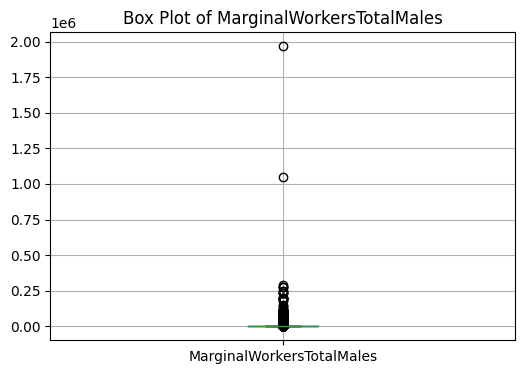

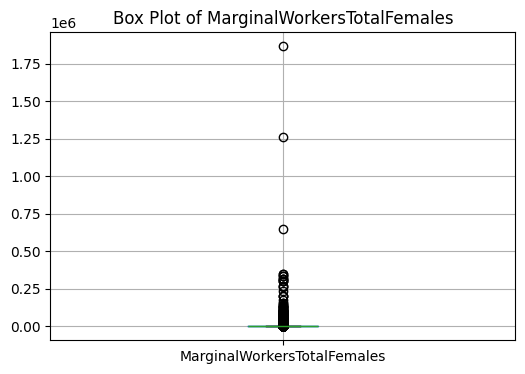

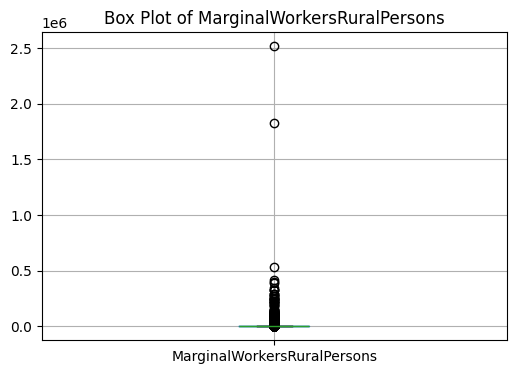

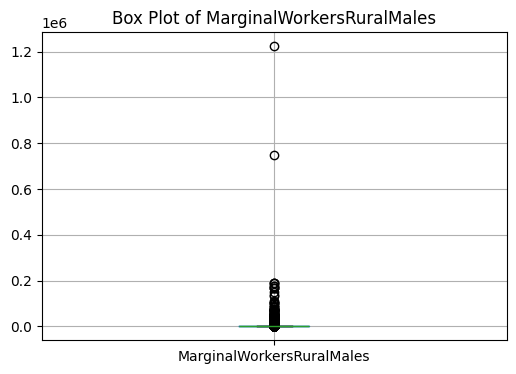

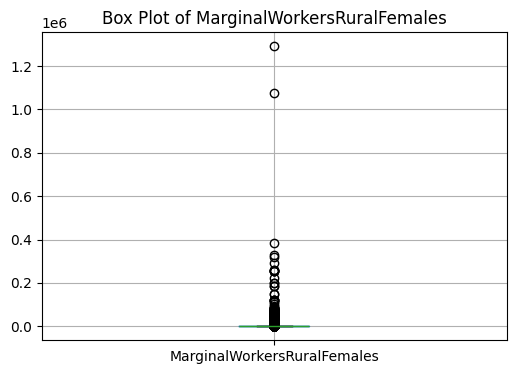

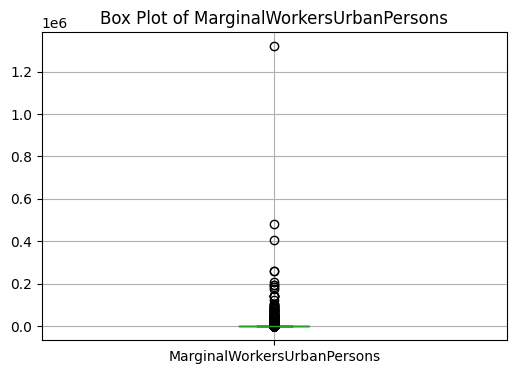

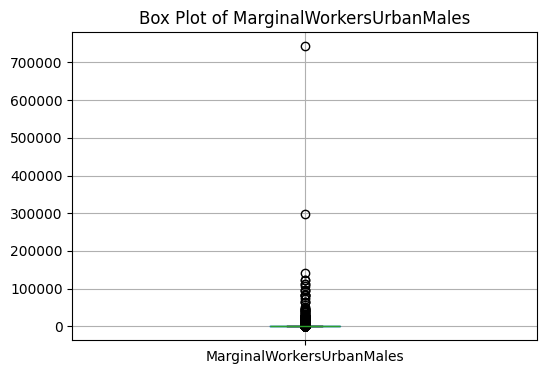

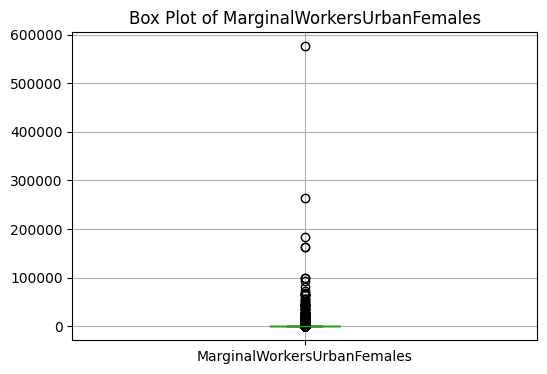

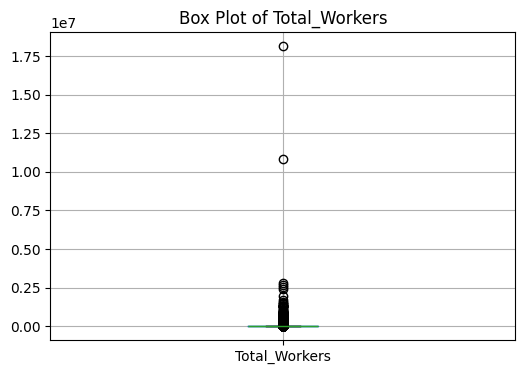

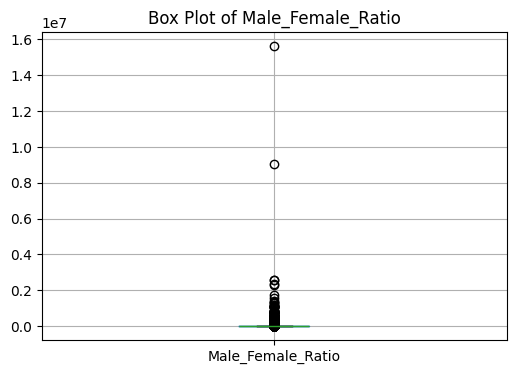

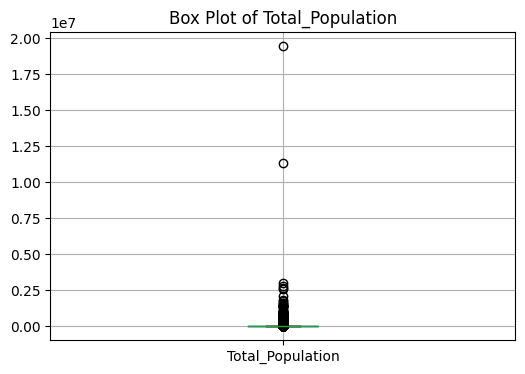

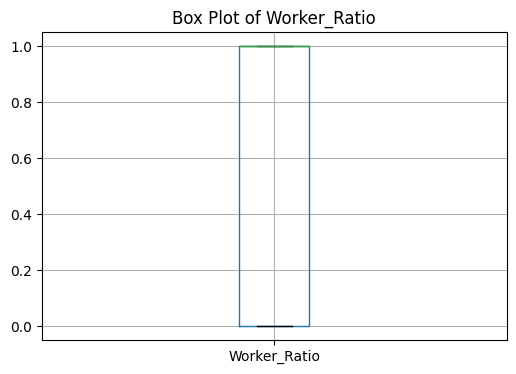

In [50]:
numerical = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'Total_Workers', 'Male_Female_Ratio', 'Total_Population', 'Worker_Ratio']

# Calculate outliers using Z-score
z_scores =df_new[numerical].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Plot Box Plots to visualize the distribution and outliers
plt.figure(figsize=(12, 8))
df_new[numerical].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

# Plot Box Plots separately for each numerical column to focus on individual distributions
for column in numerical:
    plt.figure(figsize=(6, 4))
    df_new[[column]].boxplot()
    plt.title(f"Box Plot of {column}")
    plt.show()

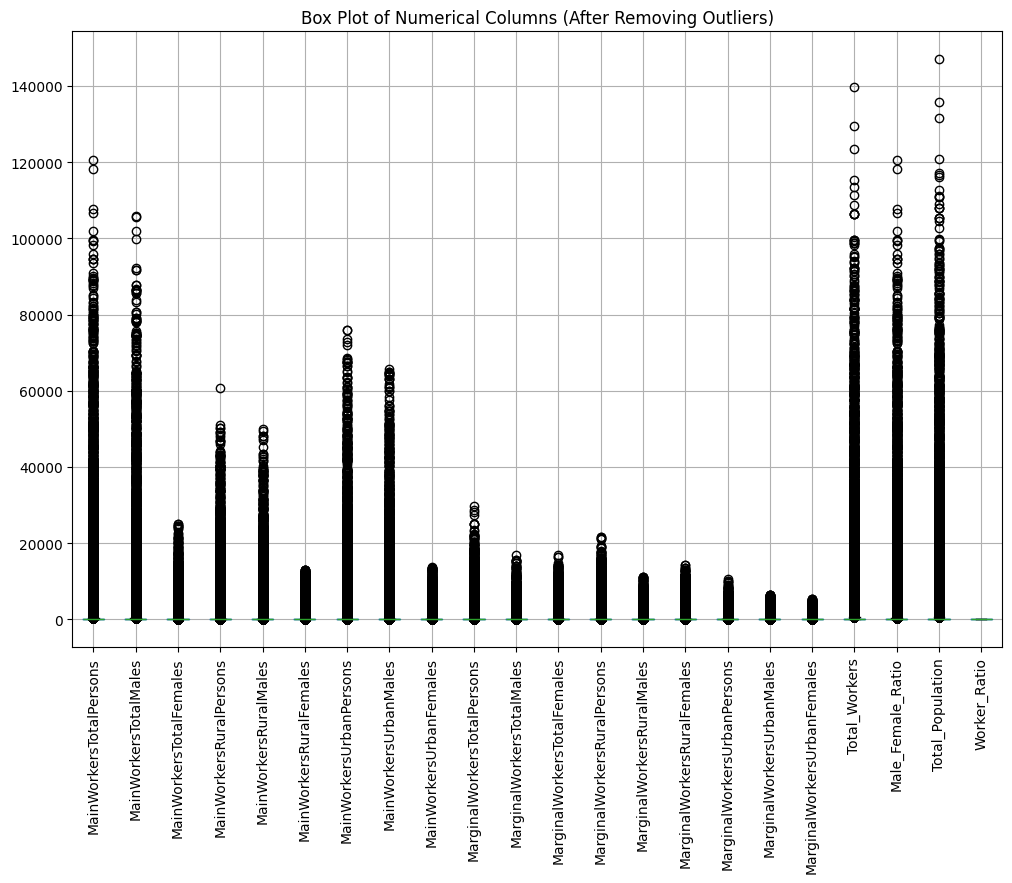

In [53]:
# Remove outliers

# Select only the numerical columns for outlier detection
numerical = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'Total_Workers', 'Male_Female_Ratio', 'Total_Population', 'Worker_Ratio']

# Calculate Z-scores for each numerical column
z_scores = df_new[numerical].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows with outliers in any numerical column
df_1_no_outliers = df_new[~outliers.any(axis=1)]

# Visualize the distribution of cleaned data with Box Plots
plt.figure(figsize=(12, 8))
df_1_no_outliers = df_new[~outliers.any(axis=1)]
df_1_no_outliers[numerical].boxplot()  # Removed the square brackets here
plt.title("Box Plot of Numerical Columns (After Removing Outliers)")
plt.xticks(rotation=90)
plt.show()

In [55]:
df_new['District']

0         North
1         North
2         North
3         North
4         North
          ...  
195140    Purba
195141    Purba
195142    Purba
195143    Purba
195144    Purba
Name: District, Length: 195145, dtype: object

In [57]:
df_new.nunique()

NICName                         587
MainWorkersTotalPersons        8679
MainWorkersTotalMales          7811
MainWorkersTotalFemales        3970
MainWorkersRuralPersons        5767
MainWorkersRuralMales          5218
MainWorkersRuralFemales        2694
MainWorkersUrbanPersons        6561
MainWorkersUrbanMales          5934
MainWorkersUrbanFemales        2929
MarginalWorkersTotalPersons    4208
MarginalWorkersTotalMales      3181
MarginalWorkersTotalFemales    2850
MarginalWorkersRuralPersons    3406
MarginalWorkersRuralMales      2535
MarginalWorkersRuralFemales    2379
MarginalWorkersUrbanPersons    2421
MarginalWorkersUrbanMales      1951
MarginalWorkersUrbanFemales    1557
State                            23
District                        440
Total_Workers                  9230
Male_Female_Ratio              8679
Total_Population               9451
Worker_Ratio                      2
latitude                         34
longitude                        33
dtype: int64

In [61]:
df_new.to_csv("Clean_HR.csv", index=False)

In [4]:
df_clean=pd.read_csv('C:/Users/USER/Desktop/Robin vs/guvi_projects/Clean_HR.csv')
df_clean.head()

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,Total_Workers,Male_Female_Ratio,Total_Population,Worker_Ratio,latitude,longitude
0,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,...,43249,15791,NCT,North,830949,828980,889989,0,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,...,137,64,NCT,North,1507,1484,1708,0,14.750429,78.570026
2,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,...,53,25,NCT,North,183,169,261,0,27.100399,93.616601
3,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,...,21,8,NCT,North,91,83,120,0,26.749981,94.216667
4,Growing of rice,9,9,0,0,0,0,9,9,0,...,0,0,NCT,North,9,10,9,1,25.785414,87.479973


In [5]:
df_clean.columns.tolist()

['NICName',
 'MainWorkersTotalPersons',
 'MainWorkersTotalMales',
 'MainWorkersTotalFemales',
 'MainWorkersRuralPersons',
 'MainWorkersRuralMales',
 'MainWorkersRuralFemales',
 'MainWorkersUrbanPersons',
 'MainWorkersUrbanMales',
 'MainWorkersUrbanFemales',
 'MarginalWorkersTotalPersons',
 'MarginalWorkersTotalMales',
 'MarginalWorkersTotalFemales',
 'MarginalWorkersRuralPersons',
 'MarginalWorkersRuralMales',
 'MarginalWorkersRuralFemales',
 'MarginalWorkersUrbanPersons',
 'MarginalWorkersUrbanMales',
 'MarginalWorkersUrbanFemales',
 'State',
 'District',
 'Total_Workers',
 'Male_Female_Ratio',
 'Total_Population',
 'Worker_Ratio',
 'latitude',
 'longitude']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_clean.dtypes

NICName                         object
MainWorkersTotalPersons          int64
MainWorkersTotalMales            int64
MainWorkersTotalFemales          int64
MainWorkersRuralPersons          int64
MainWorkersRuralMales            int64
MainWorkersRuralFemales          int64
MainWorkersUrbanPersons          int64
MainWorkersUrbanMales            int64
MainWorkersUrbanFemales          int64
MarginalWorkersTotalPersons      int64
MarginalWorkersTotalMales        int64
MarginalWorkersTotalFemales      int64
MarginalWorkersRuralPersons      int64
MarginalWorkersRuralMales        int64
MarginalWorkersRuralFemales      int64
MarginalWorkersUrbanPersons      int64
MarginalWorkersUrbanMales        int64
MarginalWorkersUrbanFemales      int64
State                           object
District                        object
Total_Workers                    int64
Male_Female_Ratio                int64
Total_Population                 int64
Worker_Ratio                     int64
latitude                 

In [74]:
df_clean['NICName'] = df_clean['NICName'].astype(str)

def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply the function to your textual data
df_clean['NICName'] = df_clean['NICName'].apply(clean_and_tokenize)

In [75]:
df_clean['NICName']

0                                                   [total]
1         [crop, animal, production, hunting, related, s...
2                            [growing, nonperennial, crops]
3         [growing, cereals, except, rice, leguminous, c...
4                                           [growing, rice]
                                ...                        
195140    [activities, extraterritorial, organizations, ...
195141                                              [blank]
195142                                              [blank]
195143        [incomplete, description, wrongly, classifed]
195144        [incomplete, description, wrongly, classifed]
Name: NICName, Length: 195145, dtype: object

In [76]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [77]:
df_clean['cleaned_text'] = df_clean['NICName'].apply(lambda tokens: ' '.join(tokens))

In [78]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_clean['cleaned_text'])

In [79]:
# Perform KMeans clustering
num_clusters =5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

# Print cluster assignments
print(df_clean[['cleaned_text', 'cluster']])

                                             cleaned_text  cluster
0                                                   total        4
1       crop animal production hunting related service...        3
2                              growing nonperennial crops        4
3       growing cereals except rice leguminous crops o...        4
4                                            growing rice        4
...                                                   ...      ...
195140   activities extraterritorial organizations bodies        2
195141                                              blank        4
195142                                              blank        4
195143           incomplete description wrongly classifed        4
195144           incomplete description wrongly classifed        4

[195145 rows x 2 columns]


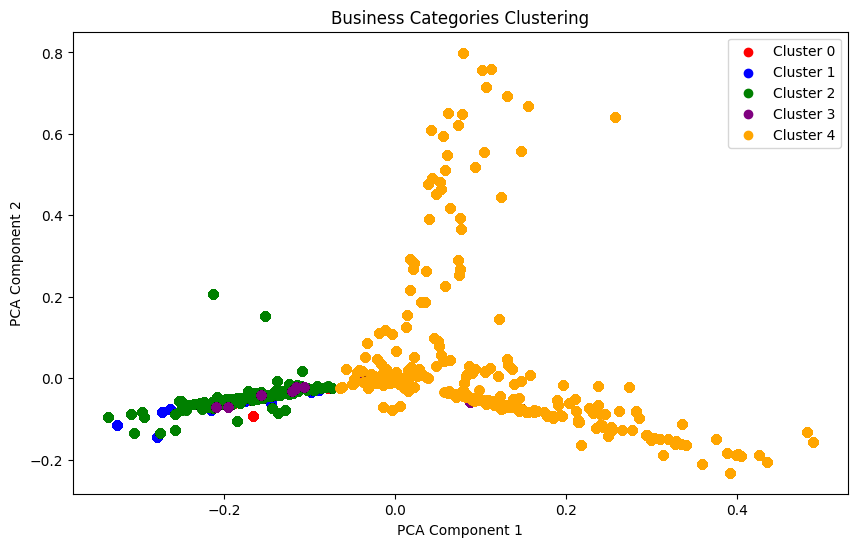

In [80]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(num_clusters):
    points = X_reduced[df_clean['cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', color=colors[i % len(colors)])

plt.title('Business Categories Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [81]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


True

In [82]:
# Create a sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Convert the list to a string
df_clean['NICName_str'] = df_clean['NICName'].apply(lambda x: ' '.join(map(str, x)))

# Apply sentiment analysis to the new string column
df_clean['sentiment_score'] = df_clean['NICName_str'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [83]:
df_clean.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'Total_Workers', 'Male_Female_Ratio', 'Total_Population',
       'Worker_Ratio', 'latitude', 'longitude', 'cleaned_text', 'cluster',
       'NICName_str', 'sentiment_score'],
      dtype='object')

In [84]:
df_clean.to_csv("Final_HR.csv", index=False)

In [88]:
#Get Datas and convert to Dataframe:
path='C:/Users/USER/Desktop/Project 1/DataSets'

HR_Resource=[]

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        file_path=os.path.join(path, filename)
        df=pd.read_csv(file_path,  encoding='ISO-8859-1')
        HR_Resource.append(df)

ref_data=pd.concat(HR_Resource, ignore_index=True)

In [90]:
ref_data['India/States'].unique()

array(['STATE - NCT OF DELHI', 'District - North West',
       'District - North', 'District - North East', 'District - East',
       'District - New Delhi', 'District - Central', 'District - West',
       'District - South West', 'District - South', 'STATE - TRIPURA',
       'District - West Tripura', 'District - South Tripura',
       'District - Dhalai', 'District - North Tripura',
       'STATE - JHARKHAND', 'District - Garhwa', 'District - Chatra',
       'District - Kodarma', 'District - Giridih', 'District - Deoghar',
       'District - Godda', 'District - Sahibganj', 'District - Pakur',
       'District - Dhanbad', 'District - Bokaro', 'District - Lohardaga',
       'District - Purbi Singhbhum', 'District - Palamu',
       'District - Latehar', 'District - Hazaribagh',
       'District - Ramgarh', 'District - Dumka', 'District - Jamtara',
       'District - Ranchi', 'District - Khunti', 'District - Gumla',
       'District - Simdega', 'District - Pashchimi Singhbhum',
       'D

In [21]:
states_data = {
    'Rajasthan': ['Jalor', 'Sirohi', 'Banswara', 'Ganganagar', 'Ajmer', 'Pali', 'Bikaner', 'Tonk', 'Sikar', 'Kota', 'Jhunjhunun', 'Dhaulpur', 'Rajsamand', 'Bhilwara', 'Alwar', 'Chittaurgarh', 'Bundi', 'Hanumangarh', 'Nagaur', 'Udaipur', 'Jhalawar', 'SawaiMadhopur', 'Baran', 'Jaipur', 'Bharatpur', 'Barmer', 'Karauli', 'Churu', 'Dausa', 'Jaisalmer', 'Dungarpur', 'Jodhpur'],
    'Odisha': ['Rayagada', 'Jajapur', 'Anugul', 'Sambalpur', 'Dhenkanal', 'Kalahandi', 'Nuapada', 'Khordha', 'Debagarh', 'Sundargarh', 'Koraput', 'Kandhamal', 'Kendujhar', 'Mayurbhanj', 'Kendrapara', 'Malkangiri', 'Jagatsinghapur', 'Puri', 'Cuttack', 'Bargarh', 'Bhadrak', 'Nayagarh', 'Gajapati', 'Baudh', 'Jharsuguda', 'Ganjam', 'Baleshwar', 'Nabarangapur', 'Balangir', 'Subarnapur'],
    'Assam': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Nagaland': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Sikkim': ['SouthDistrict', 'EastDistrict', 'NorthDistrict', 'WestDistrict'],
    'Bihar': ['Gaya', 'Nalanda', 'Patna', 'Araria', 'Supaul', 'Saran', 'Madhubani', 'Katihar', 'Kishanganj', 'Gopalganj', 'Darbhanga', 'Bhagalpur', 'Bhojpur', 'Buxar', 'Nawada', 'Muzaffarpur', 'Samastipur', 'Sheohar', 'Purnia', 'Munger', 'Sitamarhi', 'Begusarai', 'Rohtas', 'Jamui', 'Banka', 'Saharsa', 'Madhepura', 'Arwal', 'PurbaChamparan', 'Jehanabad', 'Sheikhpura', 'Vaishali', 'Khagaria', 'Lakhisarai', 'PashchimChamparan', 'KaimurBhabua', 'Siwan'],
    'Uttar Pradesh': ['Baghpat', 'Mahoba', 'KanpurNagar', 'Jhansi', 'Sultanpur', 'Saharanpur', 'Faizabad', 'Balrampur', 'Budaun', 'Mau', 'Auraiya', 'Muzaffarnagar', 'Chandauli', 'Kushinagar', 'Lalitpur', 'Lucknow', 'Shrawasti', 'Kaushambi', 'Allahabad', 'Ballia', 'AmbedkarNagar', 'Mathura', 'Aligarh', 'SantRavidasNagarBhadohi', 'RaeBareli', 'Sonbhadra', 'Ghaziabad', 'Mainpuri', 'Pilibhit', 'Bijnor', 'Bahraich', 'Banda', 'Mirzapur', 'Meerut', 'Rampur', 'Chitrakoot', 'KanshiramNagar', 'Etawah', 'Kheri', 'Kannauj', 'Jaunpur', 'Unnao', 'GautamBuddhaNagar', 'Hardoi', 'Agra', 'Farrukhabad', 'BaraBanki', 'Siddharthnagar', 'JyotibaPhuleNagar', 'Moradabad', 'Mahrajganj', 'Sitapur', 'Fatehpur', 'Ghazipur', 'Azamgarh', 'Jalaun', 'Gonda', 'Firozabad', 'Varanasi', 'SantKabirNagar', 'MahamayaNagar', 'Bareilly', 'Shahjahanpur', 'Basti', 'Gorakhpur', 'KanpurDehat', 'Deoria', 'Bulandshahr', 'Etah'],
    'Uttarakhand': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Himachal Pradesh': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Puducherry': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Tamil Nadu': ['Thoothukkudi', 'Karur', 'Namakkal', 'Dharmapuri', 'Nagapattinam', 'Thiruvarur', 'Ariyalur', 'Kancheepuram', 'Perambalur', 'Madurai', 'Coimbatore', 'Chennai', 'Kanniyakumari', 'Theni', 'Virudhunagar', 'Cuddalore', 'Salem', 'Dindigul', 'Ramanathapuram', 'Sivaganga', 'Tirunelveli', 'Erode', 'Viluppuram', 'Pudukkottai', 'Thanjavur', 'Thiruvallur', 'Tiruvannamalai', 'Krishnagiri', 'Tiruppur', 'Vellore', 'Tiruchirappalli', 'TheNilgiris'],
    'Kerala': ['Palakkad', 'Kannur', 'Kozhikode', 'Idukki', 'Thiruvananthapuram', 'Kasaragod', 'Kollam', 'Alappuzha', 'Thrissur', 'Ernakulam', 'Malappuram', 'Kottayam', 'Wayanad', 'Pathanamthitta'],
    'Goa': ['NorthGoa', 'SouthGoa'],
    'Karnataka': ['Kolar', 'DakshinaKannada', 'Yadgir', 'Chamarajanagar', 'Bijapur', 'Mandya', 'Udupi', 'Haveri', 'Davanagere', 'Hassan', 'Bangalore', 'Ramanagara', 'Chitradurga', 'Mysore', 'Dharwad', 'Shimoga', 'Koppal', 'Gulbarga', 'Bidar', 'Gadag', 'Kodagu', 'BangaloreRural', 'UttaraKannada', 'Raichur', 'Bagalkot', 'Belgaum', 'Bellary', 'Chikkaballapura', 'Chikmagalur', 'Tumkur'],
    'Maharashtra': ['Jalna', 'Kolhapur', 'Sindhudurg', 'Raigarh', 'Nanded', 'Washim', 'Gondiya', 'Gadchiroli', 'Dhule', 'Bid', 'Sangli', 'Wardha', 'Pune', 'Nagpur', 'Akola', 'Satara', 'Osmanabad', 'Yavatmal', 'Aurangabad', 'Ratnagiri', 'Parbhani', 'Latur', 'Nandurbar', 'Nashik', 'Mumbai', 'Solapur', 'Jalgaon', 'Ahmadnagar', 'Thane', 'Buldana', 'Amravati', 'Bhandara', 'MumbaiSuburban', 'Hingoli', 'Chandrapur'],
    'Gujarat': ['Rajkot', 'Ahmadabad', 'Navsari', 'Kheda', 'Patan', 'Tapi', 'Narmada', 'Porbandar', 'Anand', 'Vadodara', 'Surendranagar', 'Jamnagar', 'Kachchh', 'BanasKantha', 'SabarKantha', 'Dohad', 'TheDangs', 'Gandhinagar', 'Bhavnagar', 'Valsad', 'Amreli', 'Surat', 'PanchMahals', 'Junagadh', 'Bharuch', 'Mahesana'],
    'Jharkhand': ['Giridih', 'Khunti', 'Deoghar', 'Hazaribagh', 'Ramgarh', 'Lohardaga', 'PashchimiSinghbhum', 'Garhwa', 'Godda', 'Chatra', 'PurbiSinghbhum', 'Jamtara', 'Palamu', 'Latehar', 'Dhanbad', 'Sahibganj', 'Bokaro', 'Kodarma', 'SaraikelaKharsawan', 'Dumka', 'Gumla', 'Simdega', 'Ranchi', 'Pakur'],
    'Tripura': ['Dhalai', 'WestTripura', 'NorthTripura', 'SouthTripura'],
    'NCT of Delhi': ['Central', 'East', 'NewDelhi', 'North', 'West', 'NorthEast', 'SouthWest', 'South', 'NorthWest'],
    'West Bengal': ['Jalpaiguri', 'Hugli', 'Nadia', 'Haora', 'PaschimMedinipur', 'Kolkata', 'UttarDinajpur', 'Bankura', 'Murshidabad', 'NorthTwentyFourParganas', 'KochBihar', 'SouthTwentyFourParganas', 'PurbaMedinipur', 'Maldah', 'Darjiling', 'Puruliya', 'Birbhum', 'DakshinDinajpur', 'Barddhaman'],
    'Mizoram': ['Saiha', 'Aizawl', 'Kolasib', 'Mamit', 'Lunglei', 'Champhai', 'Lawngtlai', 'Serchhip'],
    'Manipur': ['ImphalEast', 'Ukhrul', 'Bishnupur', 'Senapati', 'ImphalWest', 'Chandel', 'Tamenglong', 'Churachandpur', 'Thoubal'],
    'Arunachal Pradesh': ['UpperSubansiri', 'DibangValley', 'Tirap', 'Anjaw', 'PapumPare', 'LowerDibangValley', 'WestSiang', 'Tawang', 'WestKameng', 'LowerSubansiri', 'KurungKumey', 'EastKameng', 'EastSiang', 'Lohit', 'Changlang', 'UpperSiang']
}

In [22]:
import re
district_list  = ['District - Ganganagar',
       'District - Hanumangarh', 'District - Bikaner', 'District - Churu',
       'District - Jhunjhunun', 'District - Alwar',
       'District - Bharatpur', 'District - Dhaulpur',
       'District - Karauli', 'District - Sawai Madhopur',
       'District - Dausa', 'District - Jaipur', 'District - Sikar',
       'District - Nagaur', 'District - Jodhpur', 'District - Jaisalmer',
       'District - Barmer', 'District - Jalor', 'District - Sirohi',
       'District - Pali', 'District - Ajmer', 'District - Tonk',
       'District - Bundi', 'District - Bhilwara', 'District - Rajsamand',
       'District - Dungarpur', 'District - Banswara',
       'District - Chittaurgarh', 'District - Kota', 'District - Baran',
       'District - Jhalawar', 'District - Udaipur',
       'District - Pratapgarh']
unique_districts = list(set([re.sub(r'[^a-zA-Z0-9]', '', district.split(" - ")[1]) for district in district_list]))

In [23]:
print(', '.join(unique_districts))

Barmer, Chittaurgarh, Bundi, Churu, Jhunjhunun, Jhalawar, Sikar, SawaiMadhopur, Jaisalmer, Ajmer, Sirohi, Jalor, Tonk, Banswara, Jaipur, Kota, Ganganagar, Baran, Pali, Pratapgarh, Bharatpur, Bhilwara, Nagaur, Rajsamand, Dhaulpur, Bikaner, Alwar, Dungarpur, Jodhpur, Hanumangarh, Karauli, Udaipur, Dausa


In [24]:
df_clean.to_csv("Final_HR.csv", index=False)

In [8]:
New_hr=pd.read_csv(r"C:/Users/USER/Desktop/Robin vs/guvi_projects/Final_HR.csv")
New_hr.head()

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,Total_Workers,Male_Female_Ratio,Total_Population,Worker_Ratio,latitude,longitude,cleaned_text,cluster,NICName_str,sentiment_score
0,['total'],828980,708129,120851,20567,17425,3142,808413,690704,117709,...,830949,828980,889989,0,11.667026,92.735983,total,4,total,0.0000
1,"['crop', 'animal', 'production', 'hunting', 'r...",1484,1271,213,179,128,51,1305,1143,162,...,1507,1484,1708,0,14.750429,78.570026,crop animal production hunting related service...,3,crop animal production hunting related service...,0.0000
2,"['growing', 'nonperennial', 'crops']",169,151,18,17,15,2,152,136,16,...,183,169,261,0,27.100399,93.616601,growing nonperennial crops,4,growing nonperennial crops,0.1779
3,"['growing', 'cereals', 'except', 'rice', 'legu...",83,81,2,9,7,2,74,74,0,...,91,83,120,0,26.749981,94.216667,growing cereals except rice leguminous crops o...,4,growing cereals except rice leguminous crops o...,0.1779
4,"['growing', 'rice']",9,9,0,0,0,0,9,9,0,...,9,10,9,1,25.785414,87.479973,growing rice,4,growing rice,0.1779


In [10]:
New_hr.columns.unique()

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'Total_Workers', 'Male_Female_Ratio', 'Total_Population',
       'Worker_Ratio', 'latitude', 'longitude', 'cleaned_text', 'cluster',
       'NICName_str', 'sentiment_score'],
      dtype='object')

In [14]:
uniq_state=New_hr['State'].unique()

In [15]:
uniq_state

array(['NCT', 'TRIPURA', 'JHARKHAND', 'GUJARAT', 'MAHARASHTRA',
       'KARNATAKA', 'GOA', 'KERALA', 'TAMIL', 'PUDUCHERRY', 'HIMACHAL',
       'UTTARAKHAND', 'UTTAR', 'BIHAR', 'SIKKIM', 'NAGALAND', 'ASSAM',
       'ODISHA', 'RAJASTHAN', 'ARUNACHAL', 'MANIPUR', 'MIZORAM', 'WEST'],
      dtype=object)